In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/DATASETS/raw_house_data.csv')

In [ ]:
Data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [ ]:
Data.shape

(5000, 16)

In [ ]:
df_header = pd.DataFrame(columns=Data.columns)
print(df_header)

Empty DataFrame
Columns: [MLS, sold_price, zipcode, longitude, latitude, lot_acres, taxes, year_built, bedrooms, bathrooms, sqrt_ft, garage, kitchen_features, fireplaces, floor_covering, HOA]
Index: []


In [ ]:
Null_Values = Data.isnull().sum()
print(Null_Values)

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64


In [ ]:

duplicates = Data.duplicated()
print(Data[duplicates])

Empty DataFrame
Columns: [MLS, sold_price, zipcode, longitude, latitude, lot_acres, taxes, year_built, bedrooms, bathrooms, sqrt_ft, garage, kitchen_features, fireplaces, floor_covering, HOA]
Index: []


In [ ]:
Data = Data.drop("MLS", axis = 1)
Data

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [ ]:
duplicates = Data.duplicated()

# Print duplicate rows
#print(Data[duplicates])
duplicates.sum()

np.int64(0)

In [ ]:
Data.dtypes

,0
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64


In [ ]:
Data_cleaned = Data.dropna(subset = ['lot_acres',
                                     'sqrt_ft',
                                     'garage',
                                     'kitchen_features',
                                     'floor_covering'])
Data_cleaned

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,Ceramic Tile,198
4995,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN


In [ ]:
Data_cleaned['fireplaces'] = pd.to_numeric(Data_cleaned['fireplaces'], errors='coerce')
Data_cleaned['HOA'] = pd.to_numeric(Data_cleaned['HOA'], errors='coerce')
#Data['kitchen_features'] = pd.to_numeric(Data['kitchen_features'], errors='coerce')
#Data['floor_covering'] = pd.to_numeric(Data['floor_covering'], errors='coerce')
Data.dtypes

/tmp/ipython-input-525-3063404381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['fireplaces'] = pd.to_numeric(Data_cleaned['fireplaces'], errors='coerce')
/tmp/ipython-input-525-3063404381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['HOA'] = pd.to_numeric(Data_cleaned['HOA'], errors='coerce')


,0
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64


In [ ]:
mean_HOA = Data_cleaned['HOA'].mean()
mean_HOA
Data_cleaned['HOA'] = Data_cleaned['HOA'].fillna(mean_HOA)

/tmp/ipython-input-526-2447480376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['HOA'] = Data_cleaned['HOA'].fillna(mean_HOA)


In [ ]:
Data_cleaned['HOA']

,HOA
0,0.00000
1,0.00000
3,82.62059
4,55.00000
5,422.00000
...,...
4994,198.00000
4995,82.62059
4996,43.00000
4997,82.62059


In [ ]:
pps = Data_cleaned['sold_price']/Data_cleaned['sqrt_ft']

In [ ]:
Data_cleaned['pps'] = pps

/tmp/ipython-input-529-2025178975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['pps'] = pps


In [ ]:
Data_cleaned['pps'].describe()

,pps
count,4908.000000
mean,212.862452
std,66.661496
min,24.544805
25%,175.912964
50%,202.822657
75%,234.292724
max,1208.333333


In [ ]:
Data_cleaned =  Data_cleaned[(Data_cleaned['pps']>=50)&(Data_cleaned['pps']<=800)]

In [ ]:
Data_cleaned.shape

(4898, 16)

In [ ]:
Data_cleaned['pps'].describe()

,pps
count,4898.000000
mean,211.794764
std,60.118263
min,56.652457
25%,175.907788
50%,202.727189
75%,234.104227
max,787.834372


In [ ]:
i = 50
bin_range = []
while i<(Data_cleaned['pps'].max()):
  bin_range.append(i)
  i = i+50

In [ ]:
bin_range

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]

In [ ]:
Data_cleaned['bin_label'] = pd.cut(Data_cleaned['pps'],bin_range, labels = False)

/tmp/ipython-input-536-4124307219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['bin_label'] = pd.cut(Data_cleaned['pps'],bin_range, labels = False)


In [ ]:
Data_cleaned['bin_label'] = Data_cleaned['bin_label']+1

/tmp/ipython-input-537-925056761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['bin_label'] = Data_cleaned['bin_label']+1


In [ ]:
Data_cleaned['bin_label'].describe()

,bin_label
count,4897.000000
mean,3.739637
std,1.223663
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,14.000000


In [ ]:
Null_Values = Data_cleaned.isnull().sum()
print(Null_Values)

sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
pps                 0
bin_label           1
dtype: int64


In [ ]:
Data_cleaned = Data_cleaned.dropna(subset=['bin_label'])

In [ ]:
Data_cleaned['sold_price_normal'] = round((Data_cleaned['sold_price']-Data_cleaned['sold_price'].mean())/Data_cleaned['sold_price'].std(),2)

In [ ]:
Data_cleaned['sqrt_ft_normal'] = round((Data_cleaned['sqrt_ft']-Data_cleaned['sqrt_ft'].mean())/Data_cleaned['sqrt_ft'].std(),2)

In [ ]:
selected_coloumns = ["sold_price",
                     "longitude",
                     "latitude",
                     "lot_acres",
                     "taxes",
                     "year_built",
                     "bedrooms",
                     "bathrooms",
                     "sqrt_ft",
                     "garage",
                     "fireplaces",
                     "HOA",
                     "sold_price_normal",
                     "sqrt_ft_normal",
                     "pps",
                     "zipcode",
                     "bin_label"]

Data_subset = Data_cleaned[selected_coloumns]

In [ ]:
Data_subset.dtypes

,0
sold_price,float64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64
garage,float64


In [ ]:
Data_subset

,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,sold_price_normal,sqrt_ft_normal,pps,zipcode,bin_label
0,5300000.0,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.00000,14.66,6.52,504.761905,85637,10.0
1,4200000.0,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.00000,11.09,3.45,575.342466,85646,11.0
3,4500000.0,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4,82.62059,12.07,5.10,498.946668,85646,9.0
4,3411450.0,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.00000,8.54,2.58,533.372420,85750,10.0
5,3250000.0,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.00000,8.02,3.01,475.007308,85718,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,535000.0,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.00000,-0.77,-1.53,254.036087,85718,5.0
4995,495000.0,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,1,82.62059,-0.90,-0.10,137.461816,85641,2.0
4996,550000.0,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,1,43.00000,-0.72,-1.33,237.273512,85750,4.0
4997,475000.0,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,0,82.62059,-0.97,-1.85,268.058691,85192,5.0


<Axes: >

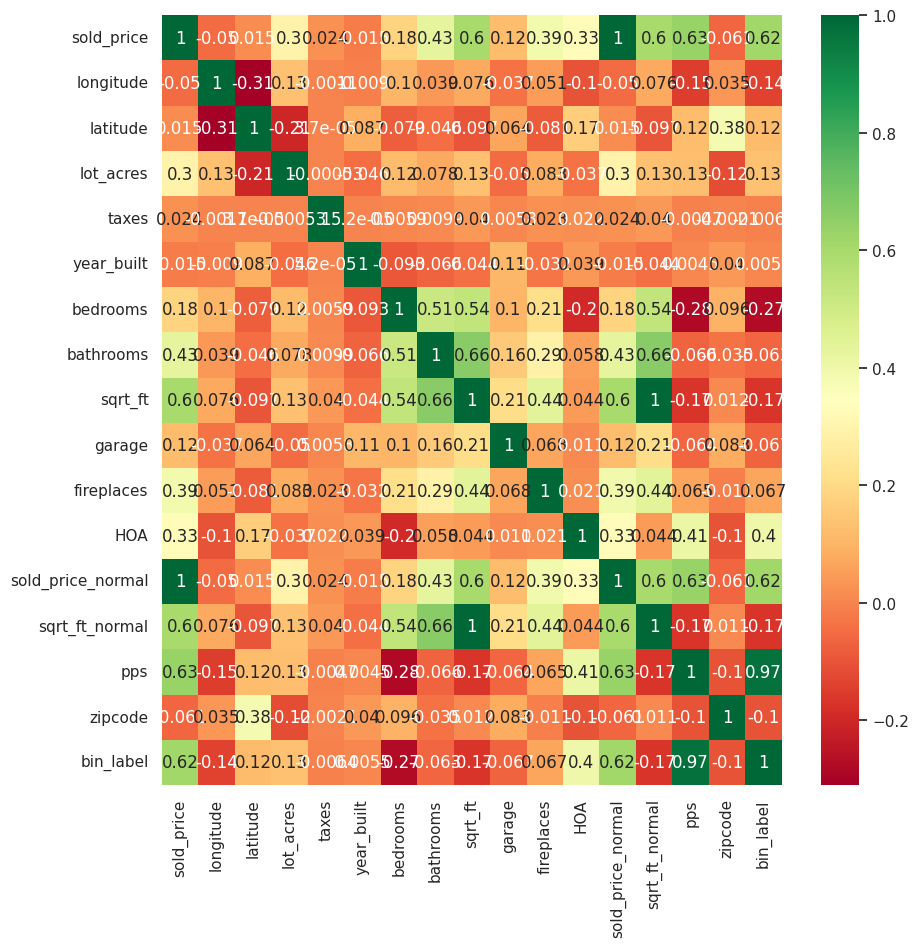

In [ ]:
correlation_matrix = Data_subset.corr()
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(correlation_matrix, annot=True, cmap=
                                        "RdYlGn"
                                        #"inferno"
                                        #"cividis"
                                        #"bwr"
                                               )

As I am taking sold_price as my dependent variable. The independent variables - longitude, latitude,taxes and year_built has not much correlation as observed by above matrix.

In [ ]:
Data_subset

,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,sold_price_normal,sqrt_ft_normal,pps,zipcode,bin_label
0,5300000.0,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,0.00000,14.66,6.52,504.761905,85637,10.0
1,4200000.0,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,0.00000,11.09,3.45,575.342466,85646,11.0
3,4500000.0,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4,82.62059,12.07,5.10,498.946668,85646,9.0
4,3411450.0,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,55.00000,8.54,2.58,533.372420,85750,10.0
5,3250000.0,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,422.00000,8.02,3.01,475.007308,85718,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,535000.0,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,1,198.00000,-0.77,-1.53,254.036087,85718,5.0
4995,495000.0,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,1,82.62059,-0.90,-0.10,137.461816,85641,2.0
4996,550000.0,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,1,43.00000,-0.72,-1.33,237.273512,85750,4.0
4997,475000.0,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,0,82.62059,-0.97,-1.85,268.058691,85192,5.0


In [ ]:
X = Data_subset.to_numpy()

In [ ]:
X

array([[ 5.30000000e+06, -1.10378200e+02,  3.13563620e+01, ...,
         5.04761905e+02,  8.56370000e+04,  1.00000000e+01],
       [ 4.20000000e+06, -1.11045371e+02,  3.15942130e+01, ...,
         5.75342466e+02,  8.56460000e+04,  1.10000000e+01],
       [ 4.50000000e+06, -1.11035925e+02,  3.16458780e+01, ...,
         4.98946668e+02,  8.56460000e+04,  9.00000000e+00],
       ...,
       [ 5.50000000e+05, -1.10858556e+02,  3.23163730e+01, ...,
         2.37273512e+02,  8.57500000e+04,  4.00000000e+00],
       [ 4.75000000e+05, -1.10755428e+02,  3.29647080e+01, ...,
         2.68058691e+02,  8.51920000e+04,  5.00000000e+00],
       [ 5.50000000e+05, -1.11055528e+02,  3.22968710e+01, ...,
         1.47690655e+02,  8.57450000e+04,  2.00000000e+00]])

In [ ]:
X.shape

(4897, 17)

In [ ]:
y = X[:, -1]

In [ ]:
y = y.astype(int)

In [ ]:
y

array([10, 11,  9, ...,  4,  5,  2])

In [ ]:
#X = X[:, :-1]

In [ ]:
X.shape

(4897, 17)

In [ ]:
X1 = X[:,:-1]

In [ ]:
X_train = X1[:int(0.8 * len(X))]

In [ ]:
y_train =y[:int(0.8* len(y))]

In [ ]:
X_test = X1[int(0.8 * len(X)):]

In [ ]:
y_test = y[int(0.8 * len(y)):]

In [ ]:
X1_test = X_test[:, (1,2,15,5,6,7,9,10,11)]

In [ ]:
X1_train = X_train[:, (1,2,15,5,6,7,9,10,11)]

In [ ]:
X1_test.shape

(980, 9)

In [ ]:
y_test.shape

(980,)

In [ ]:
X1_train

array([[-1.10378200e+02,  3.13563620e+01,  8.56370000e+04, ...,
         0.00000000e+00,  6.00000000e+00,  0.00000000e+00],
       [-1.11045371e+02,  3.15942130e+01,  8.56460000e+04, ...,
         0.00000000e+00,  5.00000000e+00,  0.00000000e+00],
       [-1.11035925e+02,  3.16458780e+01,  8.56460000e+04, ...,
         4.00000000e+00,  4.00000000e+00,  8.26205900e+01],
       ...,
       [-1.10844128e+02,  3.23254630e+01,  8.57500000e+04, ...,
         2.00000000e+00,  1.00000000e+00,  1.50000000e+02],
       [-1.10985768e+02,  3.24643050e+01,  8.57550000e+04, ...,
         3.00000000e+00,  0.00000000e+00,  4.87880000e+02],
       [-1.10995754e+02,  3.23315720e+01,  8.57040000e+04, ...,
         3.00000000e+00,  1.00000000e+00,  8.26205900e+01]])

In [ ]:
X1_train.shape

(3917, 9)

In [ ]:
X1_train.dtype

dtype('float64')

In [ ]:
y_train.shape

(3917,)

In [ ]:
#N = y_test.size
#D = X1_test.shape[1]

#KNN Classifier

In [ ]:
class KNNClassifier():

  def fit(self, X,y):
    self.X = X
    self.y = y

  def predict (self, X, K, epsilon = 1e-3):
    N = y_test.size
    D = X_test.shape[1]
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt],weights = gamma_k).argmax()

    return y_hat

In [ ]:
knn_instance = KNNClassifier()

In [ ]:
knn_instance.fit(X1_train,y_train)

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
y_hat_test = knn_instance.predict(X1_test, K= 30)

In [ ]:
accuracy(y_test, y_hat_test)

np.float64(0.47959183673469385)

In [ ]:
bin_test = y_hat_test.reshape(-1, 1)

In [ ]:
y_hat_train = knn_instance.predict(X1_train, K =30)

In [ ]:
accuracy(y_train, y_hat_train)

np.float64(0.9839162624457493)

In [ ]:
y_hat_train

array([10., 11.,  9., ...,  4.,  5.,  4.])

In [ ]:
y_hat_train1 = y_hat_train.reshape(-1, 1)

In [ ]:
bin = y_hat_train1.astype(int)

In [ ]:
bin

array([[10],
       [11],
       [ 9],
       ...,
       [ 4],
       [ 5],
       [ 4]])

In [ ]:
bin.shape

(3917, 1)

In [ ]:
#X_train = np.hstack((X_train, bin))

In [ ]:
X_train.shape

(3917, 16)

#MultiVariate Linear Regression

In [ ]:
def MAE(Y, Y_hat):
  return np.sum(np.abs((Y-Y_hat)))/len(Y)

def R2(Y, Y_hat):
  N = len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [ ]:
class MVLinearRegression():


  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = True):

    epochs = int(epochs)
    N, D = X.shape
    Y = y
    #Begin SGD
    self.W = np.random.randn(D) * 0.01
    self.J = np.zeros(epochs)
    # Begin SGD Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)
      self.W = self.W - (eta/N)*(X.T@(Y_hat-Y))
      # Gradiant of J
      grad=(1/N)*(X.T@(Y_hat-Y))
      #Weight Update Rule:
      self.W = self.W - eta*grad
    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

In [ ]:
#X2 = Data_cleaned[['sold_price_normal','bedrooms','bathrooms','Garages','pps']].copy().to_numpy()

In [ ]:
X_train.shape

(3917, 16)

In [ ]:
y_train_MV = X_train[:, 14]

In [ ]:
y_train_MV

array([504.76190476, 575.34246575, 498.94666815, ..., 214.77975974,
       251.8362069 , 208.82971268])

In [ ]:
X_train_MV = X_train[:, (5,6,7,9,10,11,15)]

In [ ]:
X_train_MV

array([[1.941000e+03, 1.300000e+01, 1.000000e+01, ..., 6.000000e+00,
        0.000000e+00, 8.563700e+04],
       [1.997000e+03, 2.000000e+00, 2.000000e+00, ..., 5.000000e+00,
        0.000000e+00, 8.564600e+04],
       [1.930000e+03, 7.000000e+00, 5.000000e+00, ..., 4.000000e+00,
        8.262059e+01, 8.564600e+04],
       ...,
       [1.999000e+03, 3.000000e+00, 3.000000e+00, ..., 1.000000e+00,
        1.500000e+02, 8.575000e+04],
       [2.019000e+03, 2.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        4.878800e+02, 8.575500e+04],
       [2.003000e+03, 4.000000e+00, 4.000000e+00, ..., 1.000000e+00,
        8.262059e+01, 8.570400e+04]])

In [ ]:
X_train_MV = np.hstack((X_train_MV, bin))

In [ ]:
X_train_MV.shape, y_train_MV.shape

((3917, 8), (3917,))

In [ ]:
my_reg = MVLinearRegression()

In [ ]:
y_test_MV = X_test[:, 14]

In [ ]:
X_test_MV = X_test[:, (5,6,7,9,10,11, 15)]

In [ ]:
X_test_MV = np.hstack((X_test_MV, bin_test))

In [ ]:
X_test_MV

array([[1.956000e+03, 4.000000e+00, 3.000000e+00, ..., 8.262059e+01,
        8.571800e+04, 3.000000e+00],
       [1.996000e+03, 4.000000e+00, 4.000000e+00, ..., 2.123800e+02,
        8.574900e+04, 3.000000e+00],
       [1.998000e+03, 3.000000e+00, 3.000000e+00, ..., 1.800000e+02,
        8.573900e+04, 4.000000e+00],
       ...,
       [1.990000e+03, 4.000000e+00, 3.000000e+00, ..., 4.300000e+01,
        8.575000e+04, 3.000000e+00],
       [1.969000e+03, 3.000000e+00, 2.000000e+00, ..., 8.262059e+01,
        8.519200e+04, 3.000000e+00],
       [2.009000e+03, 4.000000e+00, 4.000000e+00, ..., 8.262059e+01,
        8.574500e+04, 4.000000e+00]])

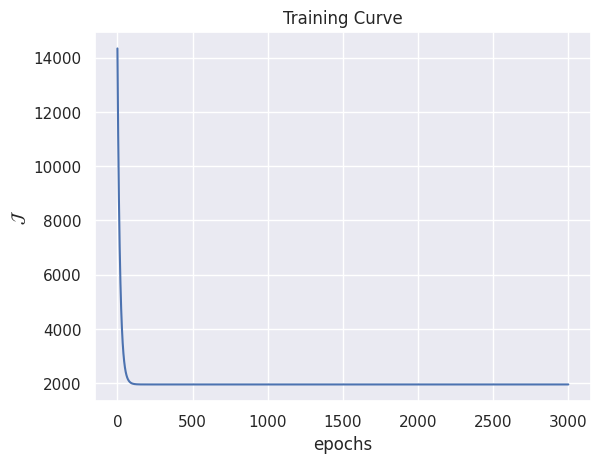

In [ ]:
my_reg.fit(X_train_MV,y_train_MV,eta=2e-12, epochs=3000)

In [ ]:
y_hat_train_MV = my_reg.predict(X_train_MV)

In [ ]:
MAE(y_train_MV,y_hat_train_MV)

np.float64(42.56980974118692)

In [ ]:
y_hat_test_MV = my_reg.predict(X_test_MV)

In [ ]:
MAE(y_test_MV,y_hat_test_MV)

np.float64(40.202015599842184)

In [ ]:
class FastLR():
  def fit(self,X,y):
    self.W = np.linalg.solve(X.T@X,X.T@y)

  def predict(self,X):
    return np.matmul(X,self.W)

fastlr = FastLR()

In [ ]:
fastlr.fit(X_train_MV,y_train_MV)

In [ ]:
y_hat_train_flr = fastlr.predict(X_train_MV)

In [ ]:
MAE(y_train_MV, y_hat_train_flr)

np.float64(12.527221950693752)

In [ ]:
y_hat_test_flr = fastlr.predict(X_test_MV)

In [ ]:
MAE(y_test_MV, y_hat_test_flr)

np.float64(32.84317981374097)

# Price Prediction using Simple Linear Regression

In [ ]:
# Defining a function using KNN classifier and Multivariate linear regression to calcuate the sold_price

def soldprice_predict_FLR_KNN(latitude, longitude, sqft, year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode):

    #lat_long = [latitude, longitude]
    long_lat = [longitude,latitude,year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode]


    bin = knn_instance.predict(long_lat, K=20)
    bin = bin.flatten()[0]


    m = np.array([year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode])
    m = np.append(m, bin)
    m = m.reshape(1, -1)


    price_per_sqft = fastlr.predict(m)
    predicted_price = sqft*price_per_sqft


    return predicted_price

In [ ]:
soldprice_predict_FLR_KNN(32.218900,-110.869863 ,1159,1954,3,2.0,1.0,0.0,0.0, 85711)

array([204970.98336039])

In [ ]:
soldprice_predict_FLR_KNN(32.28643,-110.929 ,3904,1952,4,4.0,2.0,2.0,0.0, 85718)

array([687541.5133139])

In [ ]:
soldprice_predict_FLR_KNN(32.23827,-110.936 ,1909,1958,3,4,0,1,0, 85719)

array([338097.87641377])

#Test function

## For Sqft Prediction

In [ ]:
# Defining a function using KNN classifier and Multivariate linear regression to calcuate the sqft

def sqft_predict_MV_KNN(longitude, latitude, sold_price, year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode):

    lat_long = [latitude, longitude,year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode]


    bin = knn_instance.predict(lat_long, K=20)
    bin = bin.flatten()[0]


    m = np.array([year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode])
    m = np.append(m, bin)
    m = m.reshape(1, -1)


    price_per_sqft = my_reg.predict(m)
    predicted_sqft = sold_price/price_per_sqft


    return predicted_sqft

In [ ]:
sqft_predict_MV_KNN(-110.378200,31.356362,5300000.0,1941,13,10.0,0.0,6.0,0.0, 85637)

array([24274.12841894])

## For Sold_Price Prediction

In [ ]:

# Defining a function using KNN classifier and Multivariate linear regression to calcuate the sold_price

def soldprice_predict_MV_KNN(latitude, longitude, sqft, year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode):

    #lat_long = [latitude, longitude]
    long_lat = [longitude,latitude, year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode]


    bin = knn_instance.predict(long_lat, K=20)
    bin = bin.flatten()[0]


    m = np.array([year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode])
    m = np.append(m, bin)
    m = m.reshape(1, -1)


    price_per_sqft = my_reg.predict(m)
    predicted_price = sqft*price_per_sqft


    return predicted_price

In [ ]:
soldprice_predict_MV_KNN(-110.378200,31.356362,10500,1941,13,10.0,0.0,6.0,0.0, 85637)

array([2292564.29065344])

In [ ]:
soldprice_predict_MV_KNN(32.218900,-110.869863 ,1159,1954,3,2.0,1.0,0.0,0.0, 85711)

array([253001.48513286])

In [ ]:
soldprice_predict_MV_KNN(32.28643,-110.929 ,3904,1952,4,4.0,2.0,2.0,0.0, 85718)

array([852453.49829854])

In [ ]:
soldprice_predict_MV_KNN(32.23827,-110.936 ,1909,1958,3,4,0,1,0, 85719)

array([416803.13221361])

In [ ]:
soldprice_predict_MV_KNN(32.1435337, -110.9122849, 1642, 2001, 4,2,2,0,22,85706)

array([358079.88255536])

In [ ]:
soldprice_predict_FLR_KNN(32.1435337, -110.9122849, 1642, 2001, 4,2,2,0,22,85706)

array([288696.37503258])

In [ ]:
test_KNN1 = knn_instance.predict((-110.9122849, 32.1435337), K= 200)

In [ ]:
test_KNN1

array([3., 3.])

In [ ]:
soldprice_predict_MV_KNN(32.2956831, -110.8872431, 2402, 1959, 3,3,8,1,7,85718)

array([524309.03167146])

In [ ]:
soldprice_predict_FLR_KNN(32.2956831, -110.8872431, 2402, 1959, 3,3,8,1,7,85718)

array([429052.39472503])

In [ ]:
soldprice_predict_MV_KNN(32.2803591, -110.8871833, 4500, 1971, 6,4,2,2,7,85718)

array([982285.41439287])

In [ ]:
soldprice_predict_FLR_KNN(32.2956831, -110.8872431, 2402, 1959, 3,3,8,1,7,85718)

array([429052.39472503])

In [ ]:
soldprice_predict_FLR_KNN(32.176671, -110.969319, 806, 1948, 2,1,0,0,0,85714)

array([143411.51555907])

In [ ]:
soldprice_predict_FLR_KNN( 32.228117,-110.933154, 1969, 1947, 4,3,1,1,0,85716)

array([345875.79585123])

In [ ]:
# Defining a function using KNN classifier and Multivariate linear regression to calcuate the sold_price

def soldprice_Test_FLR_KNN(latitude, longitude, sqft, year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode):

    #lat_long = [latitude, longitude]
    long_lat = [longitude,latitude,year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode]


    bin = knn_instance.predict(long_lat, K=20)
    bin = bin.flatten()[0]


    m = np.array([year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode])
    m = np.append(m, bin)
    m = m.reshape(1, -1)


    price_per_sqft = fastlr.predict(m)
    predicted_price = sqft*price_per_sqft


    return predicted_price

In [ ]:
soldprice_Test_FLR_KNN(32.228117,-110.933154, 1969, 1947, 4,3,1,1,0, 85716)

array([345875.79585123])

Text(0.5, 43.249999999999986, 'Predicted Bin')

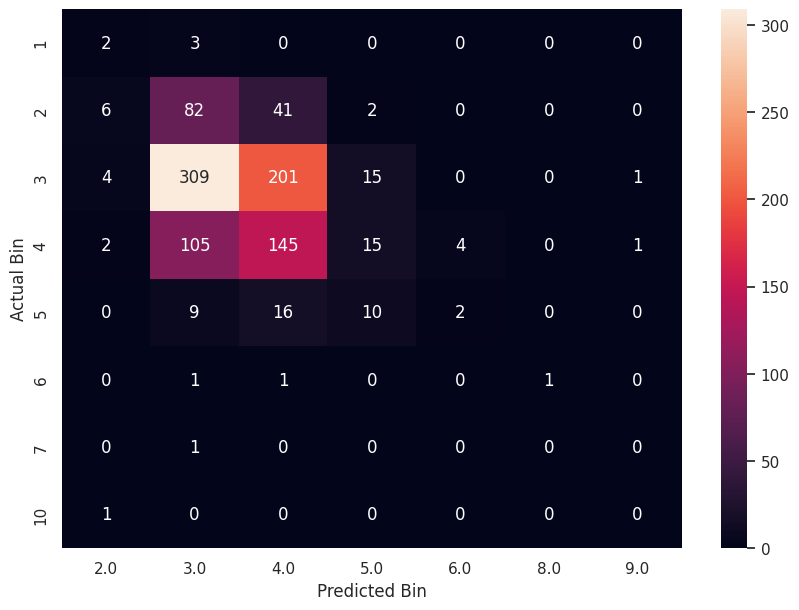

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual Bin')
plt.xlabel('Predicted Bin')



Text(0.5, 43.249999999999986, 'Predicted Bin')

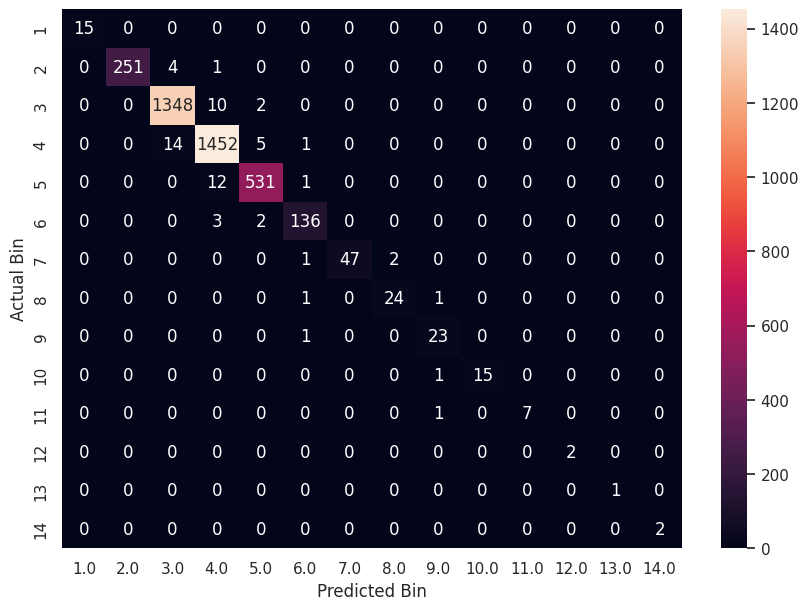

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_hat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual Bin')
plt.xlabel('Predicted Bin')

#PRESENTATION TEST

In [ ]:
#def soldprice_predict_FLR_KNN(latitude, longitude, sqft, year_built, bedrooms, bathrooms, garage, fireplaces, hoa, zipcode):

In [ ]:
soldprice_predict_FLR_KNN( 32.228117,-110.933154, 1969, 1947, 4,3,1,1,0,85716)

array([345875.79585123])

In [ ]:
soldprice_predict_FLR_KNN( 32.207747,-110.907999, 1390, 1936, 2,1,0,1,0,85711)

array([247435.47853197])

In [ ]:
soldprice_predict_FLR_KNN( 32.297232,-110.913548, 4948, 1988, 5,4,3,4,534,85718)

array([905897.11546392])

In [ ]:
soldprice_predict_FLR_KNN( 32.135162,-110.973912, 1305, 1968, 3,2,0,0,0,85706)

array([230485.69435198])

In [ ]:
166.7

In [ ]:
soldprice_predict_MV_KNN( 32.1351841,-110.9739875, 1305, 1968, 3,2,0,0,0,85706)

array([284793.30125905])

In [ ]:
a3 = 166700
b3 = 230485
c3 = (a-b)/a

In [ ]:
c3

-0.3826334733053389

In [ ]:
a2 =
b2 = 905897.67
c2 =

In [ ]:
a2 =
b2 = 905897.67
c2 =